number of estimated clusters : 4


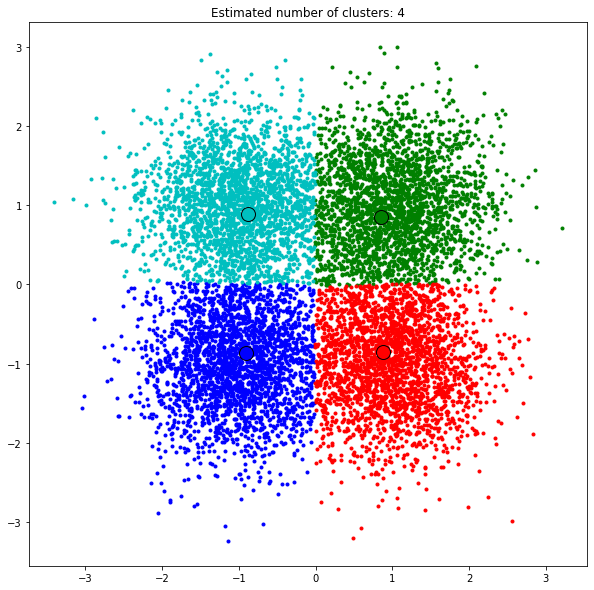

In [1]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# #############################################################################
# 利用make_blobs()生成一些满足高斯分布且各向同性的样本点，这里有三个中心点
centers = [[1, 1], [-1, -1], [1, -1],[-1,1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# #############################################################################
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

# 计算mean shift向量并进行聚类
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure(figsize=(10,10))
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


In [2]:
X

array([[-0.71130561, -1.59858946],
       [-0.1285487 ,  0.68654703],
       [ 0.44715691,  1.32984578],
       ...,
       [ 1.04847033,  1.50219513],
       [ 1.48289558, -1.77241359],
       [ 1.07123602,  0.60953976]])

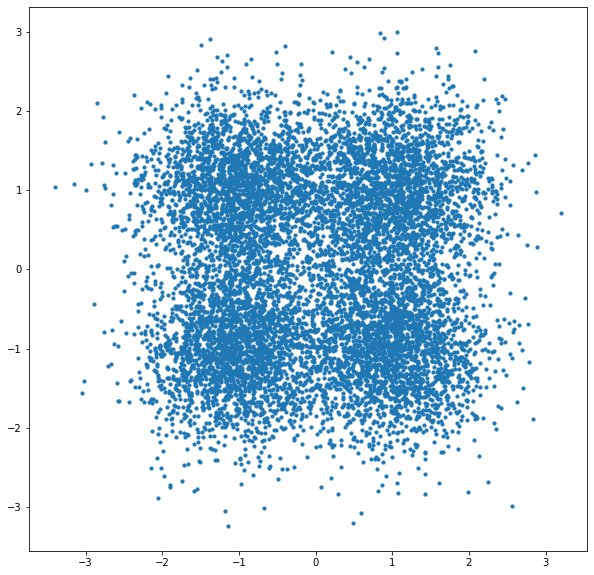

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], 10)
plt.show()

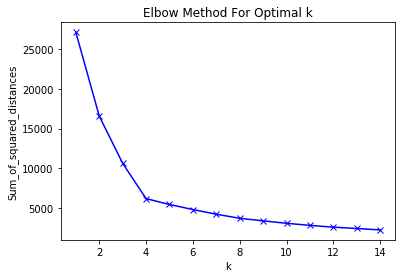

In [4]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
#Elbow method to minimize WSS (within-cluster Sum of Square)
Sum_of_squared_distances =[]
K = range(1,15)
for k in K:
    km =KMeans(n_clusters =k)
    km =km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
###plotting Elbow
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

D:\anaconda\anacNew\envs\PythonGPU\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
D:\anaconda\anacNew\envs\PythonGPU\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


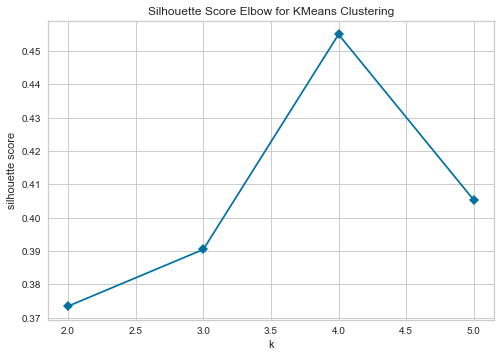

In [5]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

model = KMeans(random_state=123) 
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)
# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()

In [6]:
from sklearn.cluster import KMeans 
# Menentukan kluster dari data
kmeans = KMeans(n_clusters=4, random_state=123).fit(X)
#kmeans.fit(X)
# Menampilkan pusat cluster
print(kmeans.cluster_centers_)

[[ 1.03510315  1.03205703]
 [-1.04577074 -1.01635821]
 [-1.01826421  1.02055841]
 [ 1.00333648 -1.00259669]]


In [7]:
# Menampilkan hasil kluster
print(kmeans.labels_)

[1 2 0 ... 0 3 0]


In [26]:
# Memvisualkan hasil klusterplt.scatter(X[kmeans.labels_==0,0],X[kmeans.labels_==0,1],s=80,c='magenta',label='Careful')
plt.scatter(X[kmeans.labels_==4,0],X[kmeans.labels_==4,1],s=80,c='burlywood',label='Sensible')
plt.scatter(X[kmeans.labels_==1,0],X[kmeans.labels_==1,1],s=80,c='yellow',label='Standard')
plt.scatter(X[kmeans.labels_==2,0],X[kmeans.labels_==2,1],s=80,c='green',label='Target')
plt.scatter(X[kmeans.labels_==3,0],X[kmeans.labels_==3,1],s=80,c='cyan',label='Careless')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker = "o", alpha = 0.9,s=250,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show

NameError: name 'x_scaled' is not defined

In [12]:
X[kmeans.labels_==1,0]

array([-0.71130561, -0.98293498, -1.33274431, ..., -1.28991023,
       -1.00601335, -1.46231969])

In [13]:
X[kmeans.labels_==2,0]

array([-0.1285487 , -1.00612126, -0.58221789, ..., -1.43611222,
       -1.49496514, -1.1285315 ])

In [14]:
X[kmeans.labels_==3,0]

array([1.16782619, 0.79018322, 1.39854602, ..., 0.79284307, 0.67366538,
       1.48289558])

In [15]:
X[kmeans.labels_==4,0]

array([], dtype=float64)

In [16]:
len(kmeans.labels_)

10000

In [17]:
len(X)

10000

In [24]:
len(X[kmeans.labels_==0,0])

2483